In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('table.css').read() + open('notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
ratings = pd.read_csv("ratings.csv", encoding="utf-8")
ratings.head(5)

,userID,productID,ratings,timestamp
0,A24SSUT5CSW8BH,0078764343,5.0,1377302400
1,AK3V0HEBJMQ7J,0078764343,4.0,1372896000
2,A10BECPH7W8HM7,043933702X,5.0,1404950400
3,A2PRV9OULX1TWP,043933702X,5.0,1386115200
4,AE7GUHCDQQ4UI,043933702X,1.0,1366156800


#### How many ratings are there in the ratings dataframe?

In [4]:
len(ratings)

1324752

#### How many products have at least one ratings?

In [5]:
ratings["productID"].nunique()

50210

#### Is there any duplicate ratings? If it is find and list them

In [6]:
ratings[ratings.duplicated(["userID", "productID"]) == True]

,userID,productID,ratings,timestamp


#### How many users have at least one ratings?

In [7]:
ratings["userID"].nunique()

826766

#### Find the first rating

In [8]:
ratings.sort_values(by="timestamp", ascending=True).head(5)

,userID,productID,ratings,timestamp
7217,AR9HFLYSXUOYS,B00000JL6V,5.0,878947200
7248,A26Y5BK10TL1OI,B00000JL6V,5.0,880761600
7216,A3VMPX6KW6VSQY,B00000JL6V,5.0,881884800
7207,A3N83WBSOG9PE4,B00000JL6V,1.0,882057600
7238,A2Q6FRINMH0R81,B00000JL6V,4.0,882230400


#### Find the last ratings

In [9]:
ratings.sort_values(by="timestamp", ascending=False).head(5)

,userID,productID,ratings,timestamp
1316749,A3VMTN6BT0BS6U,B00HLT0YT0,2.0,1406073600
1015561,A311A8P3YVYZXO,B006JKARN0,5.0,1406073600
1309736,A25UO4RYDHFY1X,B00GU043AW,5.0,1406073600
1192039,A66HDPNV2IY6P,B00BI9MDSO,1.0,1406073600
1321871,A5QP5L4GB8RYD,B00IS5E7O4,4.0,1406073600


#### Make timestamp field datetime typed

In [10]:
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], unit='s')

#### Draw bar chart of ratings by year

In [11]:
ratings.timestamp.dt.year.value_counts().sort_values(ascending=False).head()

2013    362859
2014    222009
2012    168491
2011    123427
2010     90065
Name: timestamp, dtype: int64

#### Count there ratings by month

In [12]:
ratings.timestamp.dt.strftime("%B").value_counts().sort_values(ascending=False)

January      174850
December     156414
March        129266
February     117625
November     111745
April        104521
July          99920
May           98880
June          97766
October       81684
September     76372
August        75709
Name: timestamp, dtype: int64

#### On which days are there most ratings

In [13]:
ratings.timestamp.dt.strftime("%A").value_counts().sort_values(ascending=False)

Tuesday      204887
Monday       202859
Wednesday    197837
Thursday     190936
Friday       185427
Sunday       171973
Saturday     170833
Name: timestamp, dtype: int64

#### Calculate the mean value of ratings

In [14]:
ratings.ratings.mean()

3.9787530043359061

#### Calculate the mean values of ratings by userID

In [15]:
ratings[["userID", "ratings"]].groupby("userID").mean().head(5)

,ratings
userID,
A00010181745VTMHSO9TO,5.0
A0001920MO27X22Y9CL4,1.0
A0002090WKEMAO8KOWKM,5.0
A00063061AK7XBIZLCOXJ,5.0
A00065507CNSR8UHQFCK,4.0


#### Calculate the mean values of ratings by productID

In [16]:
ratings[["productID", "ratings"]].groupby("productID").mean().head()

,ratings
productID,
0078764343,4.5
043933702X,4.0
0439339960,3.0
0439339987,5.0
0439342260,4.0


#### Which 5 user have the highest mean rating value?

In [17]:
ratings[["userID", "ratings"]].groupby("userID").mean().nlargest(5, 'ratings')

,ratings
userID,
A00010181745VTMHSO9TO,5.0
A0002090WKEMAO8KOWKM,5.0
A00063061AK7XBIZLCOXJ,5.0
A00089042GMZ1I1K4M9KZ,5.0
A00089163LKXK4V19OTY2,5.0


#### Which 5 products have the highest mean rating valye?

In [18]:
ratings[["productID", "ratings"]].groupby("productID").mean().nlargest(5, 'ratings')

,ratings
productID,
0439339987,5.0
0439374391,5.0
0439591295,5.0
0439671418,5.0
0439900581,5.0


#### Which product has the lowest mean ratings?

In [19]:
ratings[["userID", "ratings"]].groupby("userID").mean().nsmallest(5, 'ratings')

,ratings
userID,
A0001920MO27X22Y9CL4,1.0
A000800052D4V0QEDLCR,1.0
A00082583JGF0RURTDN8A,1.0
A00101961G0VS92WDGJ11,1.0
A00310863RX8VBC7QTOR1,1.0


#### Which product has the lowest mean ratings?

In [20]:
ratings[["productID", "ratings"]].groupby("productID").mean().nsmallest(5, 'ratings')

,ratings
productID,
0439813182,1.0
0977710432,1.0
9573499126,1.0
9629551284,1.0
988207426X,1.0


#### How many user are there that have at least one rating for all years?

In [21]:
ratings[["userID", "timestamp"]].groupby(by="userID").timestamp.unique == ratings["timestamp"].nunique

False

#### How many products are there that have at least one rating for all years?

In [22]:
ratings[["productID", "timestamp"]].groupby(by="productID").timestamp.unique == ratings["timestamp"].unique

False

#### What is the ratings average of users

In [23]:
ratings.groupby(by="userID").ratings.mean().head(5)

userID
A00010181745VTMHSO9TO    5.0
A0001920MO27X22Y9CL4     1.0
A0002090WKEMAO8KOWKM     5.0
A00063061AK7XBIZLCOXJ    5.0
A00065507CNSR8UHQFCK     4.0
Name: ratings, dtype: float64

#### What is the ratings average of products

In [24]:
ratings.groupby(by="productID").ratings.mean().head(5)

productID
0078764343    4.5
043933702X    4.0
0439339960    3.0
0439339987    5.0
0439342260    4.0
Name: ratings, dtype: float64

#### How many ratings are there before 2000?

In [25]:
len(ratings[ratings["timestamp"].dt.year < 2000])

1014

#### How many ratings are there after 2000?

In [26]:
len(ratings[ratings["timestamp"].dt.year > 2000])

1313309

#### How many ratings are there after 2000 and before 2015?

In [27]:
len(ratings[(ratings["timestamp"].dt.year > 2000) & (ratings["timestamp"].dt.year < 2014)])

1091300

#### What is the ratings count for years

In [28]:
ratings["timestamp"].dt.year.value_counts().sort_values(ascending=False).head()

2013    362859
2014    222009
2012    168491
2011    123427
2010     90065
Name: timestamp, dtype: int64

#### What are the mean ratings for each year?

In [29]:
ratings[["timestamp", "ratings"]].groupby(by=ratings["timestamp"].dt.year).mean().sort_index().head()

,ratings
timestamp,
1997,4.000000
1998,4.000000
1999,4.110448
2000,4.088791
2001,4.058696


#### How many ratings have user that has id A00010181745VTMHSO9TO

In [30]:
len(ratings[ratings["userID"] == "A00010181745VTMHSO9TO"])

1

#### How many ratings have product that has id 0439339987

In [31]:
len(ratings[ratings["productID"] == "0439339987"])

1

#### How many ratings are there that exactly given in 24.08.2013

In [32]:
from datetime import datetime

date = datetime.strptime('24.08.2013', "%d.%m.%Y")

len(ratings[ratings["timestamp"] == date])

788

#### Draw bar chart from count of ratings in ascending order?

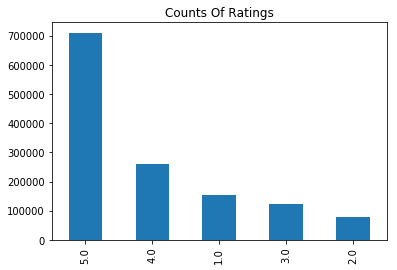

In [33]:
ratings["ratings"].value_counts().plot(kind="bar",title="Counts Of Ratings",sort_columns=True)

#### Draw bar chart from percentage of ratings in ascending order?

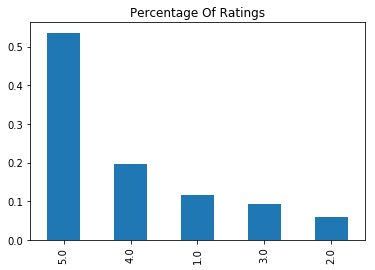

In [34]:
(ratings["ratings"].value_counts() / float(len(ratings["ratings"]))).\
    plot(kind="bar",title="Percentage Of Ratings",sort_columns=True)

#### What is the percentage of 3.0 ratings

In [35]:
len(ratings[ratings["ratings"] == 3.0]) / float(len(ratings))

0.09388172276773313

#### Which rating value is the most common in dataset?

In [36]:
ratings["ratings"].value_counts().nlargest(1)

5.0    709769
Name: ratings, dtype: int64

#### Which rating value is the least common in dataset?

In [37]:
ratings["ratings"].value_counts().nsmallest(1)

2.0    77513
Name: ratings, dtype: int64